In [1]:
!pip install -U bagpy

     |████████████████████████████████| 1.2 MB 37.9 MB/s 
     |████████████████████████████████| 603 kB 54.7 MB/s 
     |████████████████████████████████| 6.4 MB 58.3 MB/s 
     |████████████████████████████████| 1.1 MB 54.7 MB/s 
     |████████████████████████████████| 216 kB 59.3 MB/s 
     |████████████████████████████████| 2.0 MB 52.2 MB/s 
     |████████████████████████████████| 90 kB 8.1 MB/s 
     |████████████████████████████████| 2.9 MB 47.7 MB/s 
     |████████████████████████████████| 2.8 MB 50.8 MB/s 
     |████████████████████████████████| 84 kB 3.0 MB/s 
     |████████████████████████████████| 121 kB 49.5 MB/s 
     |████████████████████████████████| 90 kB 7.2 MB/s 
     |████████████████████████████████| 100 kB 7.7 MB/s 
     |████████████████████████████████| 76 kB 4.2 MB/s 
     |████████████████████████████████| 100 kB 9.6 MB/s 
     |████████████████████████████████| 51 kB 5.4 MB/s 
     |████████████████████████████████| 321 kB 52.3 MB/s 
     |████████████████████

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
from matplotlib.pyplot import figure
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.interpolate import splprep, splev
from bagpy import bagreader
import seaborn as sea
import pandas as pd


In [98]:
bag15 = bagreader('/content/drive/MyDrive/IMU/best1.bag')
bag5 = bagreader('/content/drive/MyDrive/IMU/imu_data_5hour.bag')

[INFO]  Successfully created the data folder /content/drive/MyDrive/IMU/best1.
[INFO]  Data folder /content/drive/MyDrive/IMU/imu_data_5hour already exists. Not creating.


In [183]:
imu_msg = bag15.message_by_topic('/imu')
mag_msg = bag15.message_by_topic('/magnetometer')


In [184]:
df_imu = pd.read_csv(imu_msg)
df_mag = pd.read_csv(mag_msg)

In [185]:
df_mag

,Time,header.seq,header.stamp.secs,header.stamp.nsecs,header.frame_id,magnetic_field.x,magnetic_field.y,magnetic_field.z,magnetic_field_covariance_0,magnetic_field_covariance_1,magnetic_field_covariance_2,magnetic_field_covariance_3,magnetic_field_covariance_4,magnetic_field_covariance_5,magnetic_field_covariance_6,magnetic_field_covariance_7,magnetic_field_covariance_8
0,1.646181e+09,1,1646180985,427178859,Magnetometer_Data,-0.2532,-0.0257,0.2473,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.646181e+09,2,1646180985,452230691,Magnetometer_Data,-0.2521,-0.0257,0.2461,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.646181e+09,3,1646180985,477116107,Magnetometer_Data,-0.2527,-0.0251,0.2454,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.646181e+09,4,1646180985,502036809,Magnetometer_Data,-0.2522,-0.0275,0.2409,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.646181e+09,5,1646180985,527070760,Magnetometer_Data,-0.2543,-0.0263,0.2466,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32927,1.646182e+09,32928,1646181808,605349302,Magnetometer_Data,-0.2537,-0.0239,0.2466,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32928,1.646182e+09,32929,1646181808,630365610,Magnetometer_Data,-0.2527,-0.0286,0.2486,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32929,1.646182e+09,32930,1646181808,655364513,Magnetometer_Data,-0.2532,-0.0251,0.2492,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32930,1.646182e+09,32931,1646181808,680334806,Magnetometer_Data,-0.2515,-0.0257,0.2467,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [186]:
df_imu

,Time,header.seq,header.stamp.secs,header.stamp.nsecs,header.frame_id,orientation.x,orientation.y,orientation.z,orientation.w,orientation_covariance_0,orientation_covariance_1,orientation_covariance_2,orientation_covariance_3,orientation_covariance_4,orientation_covariance_5,orientation_covariance_6,orientation_covariance_7,orientation_covariance_8,angular_velocity.x,angular_velocity.y,angular_velocity.z,angular_velocity_covariance_0,angular_velocity_covariance_1,angular_velocity_covariance_2,angular_velocity_covariance_3,angular_velocity_covariance_4,angular_velocity_covariance_5,angular_velocity_covariance_6,angular_velocity_covariance_7,angular_velocity_covariance_8,linear_acceleration.x,linear_acceleration.y,linear_acceleration.z,linear_acceleration_covariance_0,linear_acceleration_covariance_1,linear_acceleration_covariance_2,linear_acceleration_covariance_3,linear_acceleration_covariance_4,linear_acceleration_covariance_5,linear_acceleration_covariance_6,linear_acceleration_covariance_7,linear_acceleration_covariance_8
0,1.646181e+09,176,1646180985,427141904,IMU_DATA,-0.024486,-0.011943,-0.866504,0.498425,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000698,0.000931,0.001315,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.519,0.048,-9.582,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.646181e+09,177,1646180985,452197790,IMU_DATA,-0.024486,-0.011943,-0.866496,0.498440,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000201,-0.001442,0.003762,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.524,0.009,-9.571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.646181e+09,178,1646180985,477082967,IMU_DATA,-0.024490,-0.011936,-0.866496,0.498440,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000014,0.000097,0.001736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.531,0.025,-9.653,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.646181e+09,179,1646180985,502004384,IMU_DATA,-0.024498,-0.011940,-0.866491,0.498448,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000329,-0.003386,0.002378,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.499,0.041,-9.662,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.646181e+09,180,1646180985,527038097,IMU_DATA,-0.024494,-0.011929,-0.866483,0.498463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000012,-0.001227,0.003527,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.524,0.024,-9.603,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32927,1.646182e+09,33103,1646181808,605324983,IMU_DATA,-0.024774,-0.011947,-0.866978,0.497587,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000431,-0.003547,0.001663,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.552,0.053,-9.666,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32928,1.646182e+09,33104,1646181808,630343198,IMU_DATA,-0.024791,-0.011917,-0.866974,0.497593,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000695,-0.000523,0.000088,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.517,0.055,-9.616,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32929,1.646182e+09,33105,1646181808,655341625,IMU_DATA,-0.024798,-0.011921,-0.866970,0.497601,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000681,-0.002032,0.001434,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.536,0.034,-9.566,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32930,1.646182e+09,33106,1646181808,680311441,IMU_DATA,-0.024798,-0.011921,-0.866970,0.497601,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000613,-0.000183,0.001046,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.489,0.036,-9.655,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [198]:
df_imu1 = df_mag[['magnetic_field.x','magnetic_field.y','magnetic_field.z',]]

In [199]:
df_imu1.describe()

,magnetic_field.x,magnetic_field.y,magnetic_field.z
count,32932.000000,32932.000000,32932.000000
mean,-0.250810,-0.026741,0.241949
std,0.002686,0.001998,0.006565
min,-0.260900,-0.034900,0.207400
25%,-0.252100,-0.028100,0.238400
50%,-0.251000,-0.026900,0.241600
75%,-0.249400,-0.025600,0.245400
max,-0.240500,-0.017900,0.270900


#15min IMU Data Analysis

Orientation

In [103]:
sequence = df_imu['header.seq']
qx = df_imu['orientation.x']
qy = df_imu['orientation.y']
qz = df_imu['orientation.z']
qw = df_imu['orientation.w']

In [104]:
qw_mean = np.mean(qw)
qw_dev = np.std(qw)
list_qw = np.ones((qw.shape[0],1))*qw_mean
list_qw_std1 = np.ones((qw.shape[0],1))*qw_dev+list_qw
list_qw_std2 = -np.ones((qw.shape[0],1))*qw_dev+list_qw

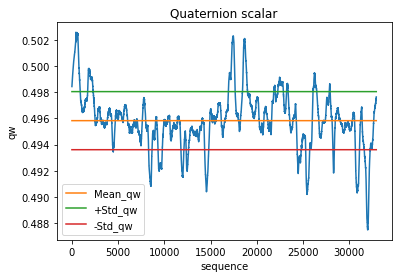

In [105]:
plt.plot(qw)
plt.plot(list_qw, label='Mean_qw')
plt.plot(list_qw_std1, label='+Std_qw')
plt.plot(list_qw_std2, label='-Std_qw')
plt.xlabel('sequence')
plt.ylabel('qw')
plt.title('Quaternion scalar')
plt.legend()

In [106]:
qx_mean = np.mean(qx)
qx_dev = np.std(qx)
list_qx = np.ones((qx.shape[0],1))*qx_mean
list_qx_std1 = np.ones((qx.shape[0],1))*qx_dev+list_qx
list_qx_std2 = -np.ones((qx.shape[0],1))*qx_dev+list_qx

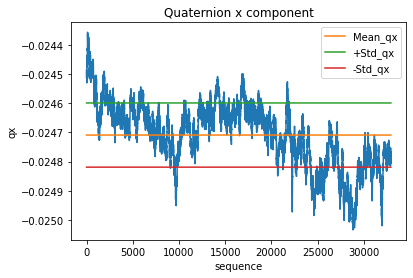

In [107]:
plt.plot(qx)
plt.plot(list_qx, label='Mean_qx')
plt.plot(list_qx_std1, label='+Std_qx')
plt.plot(list_qx_std2, label='-Std_qx')
plt.xlabel('sequence')
plt.ylabel('qx')
plt.title('Quaternion x component')
plt.legend()

In [108]:
qy_mean = np.mean(qy)
qy_dev = np.std(qy)
list_qy = np.ones((qy.shape[0],1))*qy_mean
list_qy_std1 = np.ones((qy.shape[0],1))*qy_dev+list_qy
list_qy_std2 = -np.ones((qy.shape[0],1))*qy_dev+list_qy

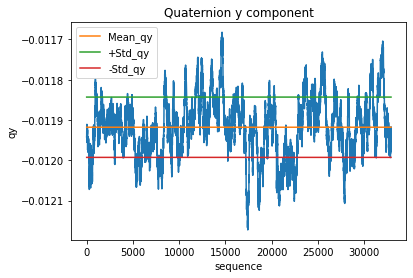

In [109]:
plt.plot(qy)
plt.plot(list_qy, label='Mean_qy')
plt.plot(list_qy_std1, label='+Std_qy')
plt.plot(list_qy_std2, label='-Std_qy')
plt.xlabel('sequence')
plt.ylabel('qy')
plt.title('Quaternion y component')
plt.legend()

In [110]:
qz_mean = np.mean(qz)
qz_dev = np.std(qz)
list_qz = np.ones((qz.shape[0],1))*qz_mean
list_qz_std1 = np.ones((qz.shape[0],1))*qz_dev+list_qz
list_qz_std2 = -np.ones((qz.shape[0],1))*qz_dev+list_qz

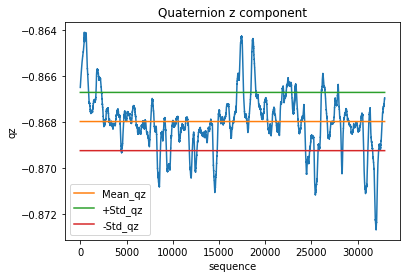

In [111]:
plt.plot(qz)
plt.plot(list_qz, label='Mean_qz')
plt.plot(list_qz_std1, label='+Std_qz')
plt.plot(list_qz_std2, label='-Std_qz')
plt.xlabel('sequence')
plt.ylabel('qz')
plt.title('Quaternion z component')
plt.legend()

Angular velocity 

In [112]:
wx = df_imu['angular_velocity.x']
wy = df_imu['angular_velocity.y']
wz = df_imu['angular_velocity.z']

In [113]:
wx_mean = np.mean(wx)
wx_dev = np.std(wx)
list_wx = np.ones((wx.shape[0],1))*wx_mean
list_wx_std1 = np.ones((wx.shape[0],1))*wx_dev+list_wx
list_wx_std2 = -np.ones((wx.shape[0],1))*wx_dev+list_wx

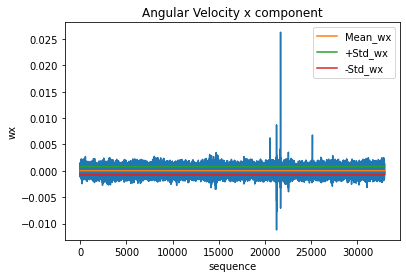

In [114]:
plt.plot(wx)
plt.plot(list_wx, label='Mean_wx')
plt.plot(list_wx_std1, label='+Std_wx')
plt.plot(list_wx_std2, label='-Std_wx')
plt.xlabel('sequence')
plt.ylabel('wx')
plt.title('Angular Velocity x component')
plt.legend()

In [115]:
wy_mean = np.mean(wy)
wy_dev = np.std(wy)
list_wy = np.ones((wy.shape[0],1))*wx_mean
list_wy_std1 = np.ones((wy.shape[0],1))*wy_dev+list_wy
list_wy_std2 = -np.ones((wy.shape[0],1))*wy_dev+list_wy

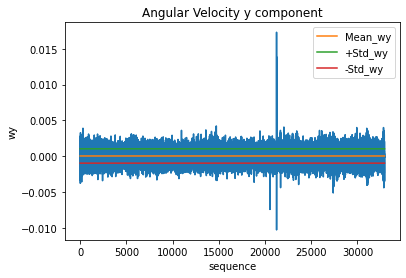

In [116]:
plt.plot(wy)
plt.plot(list_wy, label='Mean_wy')
plt.plot(list_wy_std1, label='+Std_wy')
plt.plot(list_wy_std2, label='-Std_wy')
plt.xlabel('sequence')
plt.ylabel('wy')
plt.title('Angular Velocity y component')
plt.legend()

In [117]:
wz_mean = np.mean(wz)
wz_dev = np.std(wz)
list_wz = np.ones((wz.shape[0],1))*wz_mean
list_wz_std1 = np.ones((wz.shape[0],1))*wz_dev+list_wz
list_wz_std2 = -np.ones((wz.shape[0],1))*wz_dev+list_wz

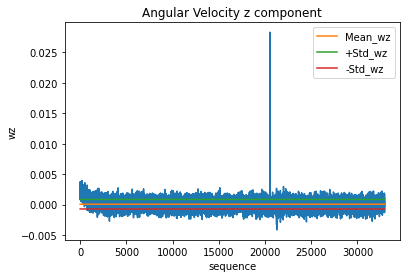

In [118]:
plt.plot(wz)
plt.plot(list_wz, label='Mean_wz')
plt.plot(list_wz_std1, label='+Std_wz')
plt.plot(list_wz_std2, label='-Std_wz')
plt.xlabel('sequence')
plt.ylabel('wz')
plt.title('Angular Velocity z component')
plt.legend()

Linear Accleration 

In [119]:
ax = df_imu['linear_acceleration.x']
ay = df_imu['linear_acceleration.y']
az = df_imu['linear_acceleration.z']

In [120]:
ax_mean = np.mean(ax)
ax_dev = np.std(ax)
list_ax = np.ones((ax.shape[0],1))*ax_mean
list_ax_std1 = np.ones((ax.shape[0],1))*ax_dev+list_ax
list_ax_std2 = -np.ones((ax.shape[0],1))*ax_dev+list_ax

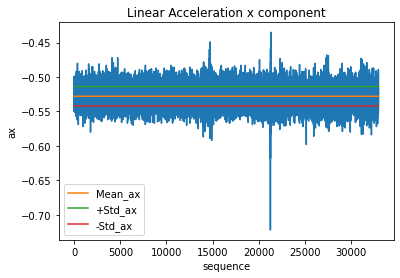

In [121]:
plt.plot(ax)
plt.plot(list_ax, label='Mean_ax')
plt.plot(list_ax_std1, label='+Std_ax')
plt.plot(list_ax_std2, label='-Std_ax')
plt.xlabel('sequence')
plt.ylabel('ax')
plt.title('Linear Acceleration x component')
plt.legend()

In [122]:
ay_mean = np.mean(ay)
ay_dev = np.std(ay)
list_ay = np.ones((ay.shape[0],1))*ay_mean
list_ay_std1 = np.ones((ay.shape[0],1))*ay_dev+list_ay
list_ay_std2 = -np.ones((ay.shape[0],1))*ay_dev+list_ay

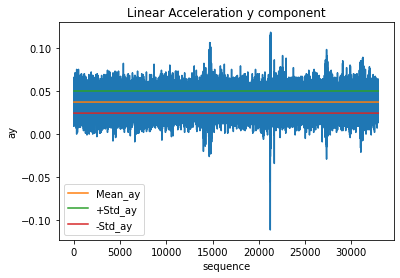

In [123]:
plt.plot(ay)
plt.plot(list_ay, label='Mean_ay')
plt.plot(list_ay_std1, label='+Std_ay')
plt.plot(list_ay_std2, label='-Std_ay')
plt.xlabel('sequence')
plt.ylabel('ay')
plt.title('Linear Acceleration y component')
plt.legend()

In [124]:
az_mean = np.mean(az)
az_dev = np.std(az)
list_az = np.ones((az.shape[0],1))*az_mean
list_az_std1 = np.ones((az.shape[0],1))*az_dev+list_az
list_az_std2 = -np.ones((az.shape[0],1))*az_dev+list_az

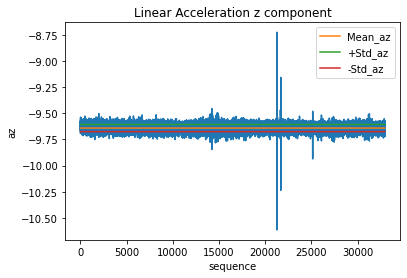

In [125]:
plt.plot(az)
plt.plot(list_az, label='Mean_az')
plt.plot(list_az_std1, label='+Std_az')
plt.plot(list_az_std2, label='-Std_az')
plt.xlabel('sequence')
plt.ylabel('az')
plt.title('Linear Acceleration z component')
plt.legend()

Magnetometer

In [126]:
mx = df_mag['magnetic_field.x']
my = df_mag['magnetic_field.y']
mz = df_mag['magnetic_field.z']

In [127]:
mx_mean = np.mean(mx)
mx_dev = np.std(mx)
list_mx = np.ones((mx.shape[0],1))*mx_mean
list_mx_std1 = np.ones((mx.shape[0],1))*mx_dev+list_mx
list_mx_std2 = -np.ones((mx.shape[0],1))*mx_dev+list_mx

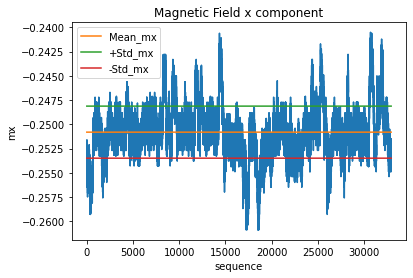

In [128]:
plt.plot(mx)
plt.plot(list_mx, label='Mean_mx')
plt.plot(list_mx_std1, label='+Std_mx')
plt.plot(list_mx_std2, label='-Std_mx')
plt.xlabel('sequence')
plt.ylabel('mx')
plt.title('Magnetic Field x component')
plt.legend()

In [129]:
my_mean = np.mean(my)
my_dev = np.std(my)
list_my = np.ones((my.shape[0],1))*my_mean
list_my_std1 = np.ones((my.shape[0],1))*my_dev+list_my
list_my_std2 = -np.ones((my.shape[0],1))*my_dev+list_my

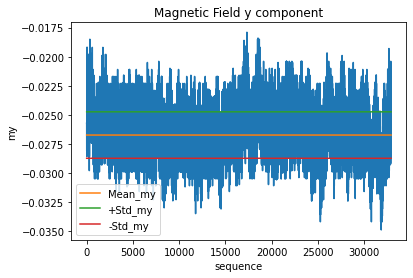

In [130]:
plt.plot(my)
plt.plot(list_my, label='Mean_my')
plt.plot(list_my_std1, label='+Std_my')
plt.plot(list_my_std2, label='-Std_my')
plt.xlabel('sequence')
plt.ylabel('my')
plt.title('Magnetic Field y component')
plt.legend()

In [131]:
mz_mean = np.mean(mz)
mz_dev = np.std(mz)
list_mz = np.ones((mz.shape[0],1))*mz_mean
list_mz_std1 = np.ones((mz.shape[0],1))*mz_dev+list_mz
list_mz_std2 = -np.ones((mz.shape[0],1))*mz_dev+list_mz

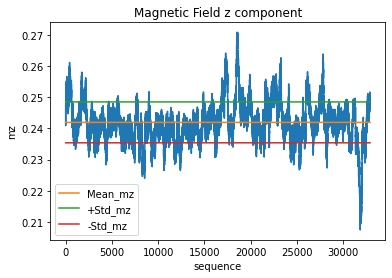

In [132]:
plt.plot(mz)
plt.plot(list_mz, label='Mean_mz')
plt.plot(list_mz_std1, label='+Std_mz')
plt.plot(list_mz_std2, label='-Std_mz')
plt.xlabel('sequence')
plt.ylabel('mz')
plt.title('Magnetic Field z component')
plt.legend()

# 5hr Data

In [200]:
imu_msg = bag5.message_by_topic('imu')
mag_msg = bag5.message_by_topic('magnetometer')


In [147]:
df_imu = pd.read_csv(imu_msg)
df_mag = pd.read_csv(mag_msg)

In [148]:
df_mag

,Time,header.seq,header.stamp.secs,header.stamp.nsecs,header.frame_id,magnetic_field.x,magnetic_field.y,magnetic_field.z,magnetic_field_covariance_0,magnetic_field_covariance_1,magnetic_field_covariance_2,magnetic_field_covariance_3,magnetic_field_covariance_4,magnetic_field_covariance_5,magnetic_field_covariance_6,magnetic_field_covariance_7,magnetic_field_covariance_8
0,1.645941e+09,1,0,0,NaN,-0.000022,0.000012,0.000041,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.645941e+09,2,0,0,NaN,-0.000022,0.000012,0.000041,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.645941e+09,3,0,0,NaN,-0.000022,0.000012,0.000041,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.645941e+09,4,0,0,NaN,-0.000022,0.000012,0.000041,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.645941e+09,5,0,0,NaN,-0.000022,0.000012,0.000041,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
719987,1.645959e+09,719988,0,0,NaN,-0.000022,0.000013,0.000041,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
719988,1.645959e+09,719989,0,0,NaN,-0.000022,0.000013,0.000042,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
719989,1.645959e+09,719990,0,0,NaN,-0.000023,0.000012,0.000041,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
719990,1.645959e+09,719991,0,0,NaN,-0.000022,0.000013,0.000041,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [149]:
df_imu

,Time,header.seq,header.stamp.secs,header.stamp.nsecs,header.frame_id,orientation.x,orientation.y,orientation.z,orientation.w,orientation_covariance_0,orientation_covariance_1,orientation_covariance_2,orientation_covariance_3,orientation_covariance_4,orientation_covariance_5,orientation_covariance_6,orientation_covariance_7,orientation_covariance_8,angular_velocity.x,angular_velocity.y,angular_velocity.z,angular_velocity_covariance_0,angular_velocity_covariance_1,angular_velocity_covariance_2,angular_velocity_covariance_3,angular_velocity_covariance_4,angular_velocity_covariance_5,angular_velocity_covariance_6,angular_velocity_covariance_7,angular_velocity_covariance_8,linear_acceleration.x,linear_acceleration.y,linear_acceleration.z,linear_acceleration_covariance_0,linear_acceleration_covariance_1,linear_acceleration_covariance_2,linear_acceleration_covariance_3,linear_acceleration_covariance_4,linear_acceleration_covariance_5,linear_acceleration_covariance_6,linear_acceleration_covariance_7,linear_acceleration_covariance_8
0,1.645941e+09,2868,0,0,NaN,-0.008637,0.007671,0.919045,0.393985,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000154,0.000552,0.001327,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.190,-0.077,-9.745,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.645941e+09,2869,0,0,NaN,-0.008637,0.007670,0.919055,0.393960,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000112,0.000639,0.000157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.216,-0.090,-9.718,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.645941e+09,2870,0,0,NaN,-0.008629,0.007667,0.919052,0.393968,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000549,-0.001033,-0.000852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.202,-0.060,-9.752,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.645941e+09,2871,0,0,NaN,-0.008637,0.007671,0.919045,0.393985,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000234,-0.000104,0.000115,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.209,-0.050,-9.762,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.645941e+09,2872,0,0,NaN,-0.008645,0.007674,0.919034,0.394008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000802,0.000063,0.000385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.200,-0.082,-9.791,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
719987,1.645959e+09,722855,0,0,NaN,-0.006136,0.019693,0.918750,0.394300,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000203,-0.001052,-0.000301,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.247,-0.301,-9.739,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
719988,1.645959e+09,722856,0,0,NaN,-0.006128,0.019690,0.918754,0.394292,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000661,-0.000303,0.000603,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.246,-0.308,-9.744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
719989,1.645959e+09,722857,0,0,NaN,-0.006124,0.019678,0.918758,0.394284,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000429,-0.001183,-0.000729,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.258,-0.309,-9.753,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
719990,1.645959e+09,722858,0,0,NaN,-0.006116,0.019694,0.918747,0.394308,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000835,0.000367,-0.000299,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.257,-0.290,-9.760,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#5 hr IMU Data Analysis

Orientation

In [150]:
sequence = df_imu['header.seq']
qx = df_imu['orientation.x']
qy = df_imu['orientation.y']
qz = df_imu['orientation.z']
qw = df_imu['orientation.w']

In [151]:
qw_mean = np.mean(qw)
qw_dev = np.std(qw)
list_qw = np.ones((qw.shape[0],1))*qw_mean
list_qw_std1 = np.ones((qw.shape[0],1))*qw_dev+list_qw
list_qw_std2 = -np.ones((qw.shape[0],1))*qw_dev+list_qw

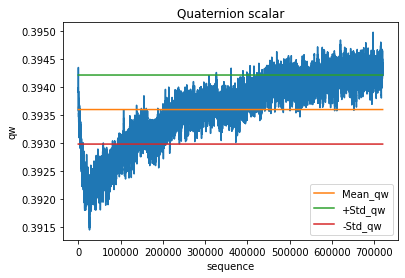

In [152]:
plt.plot(qw)
plt.plot(list_qw, label='Mean_qw')
plt.plot(list_qw_std1, label='+Std_qw')
plt.plot(list_qw_std2, label='-Std_qw')
plt.xlabel('sequence')
plt.ylabel('qw')
plt.title('Quaternion scalar')
plt.legend()

In [153]:
qx_mean = np.mean(qx)
qx_dev = np.std(qx)
list_qx = np.ones((qx.shape[0],1))*qx_mean
list_qx_std1 = np.ones((qx.shape[0],1))*qx_dev+list_qx
list_qx_std2 = -np.ones((qx.shape[0],1))*qx_dev+list_qx

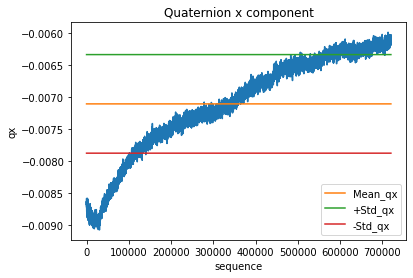

In [154]:
plt.plot(qx)
plt.plot(list_qx, label='Mean_qx')
plt.plot(list_qx_std1, label='+Std_qx')
plt.plot(list_qx_std2, label='-Std_qx')
plt.xlabel('sequence')
plt.ylabel('qx')
plt.title('Quaternion x component')
plt.legend()

In [155]:
qy_mean = np.mean(qy)
qy_dev = np.std(qy)
list_qy = np.ones((qy.shape[0],1))*qy_mean
list_qy_std1 = np.ones((qy.shape[0],1))*qy_dev+list_qy
list_qy_std2 = -np.ones((qy.shape[0],1))*qy_dev+list_qy

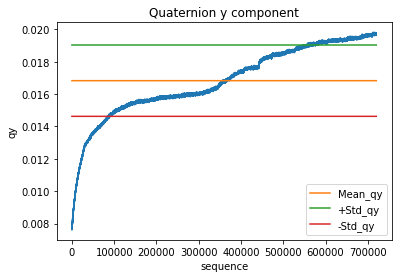

In [156]:
plt.plot(qy)
plt.plot(list_qy, label='Mean_qy')
plt.plot(list_qy_std1, label='+Std_qy')
plt.plot(list_qy_std2, label='-Std_qy')
plt.xlabel('sequence')
plt.ylabel('qy')
plt.title('Quaternion y component')
plt.legend()

In [157]:
qz_mean = np.mean(qz)
qz_dev = np.std(qz)
list_qz = np.ones((qz.shape[0],1))*qz_mean
list_qz_std1 = np.ones((qz.shape[0],1))*qz_dev+list_qz
list_qz_std2 = -np.ones((qz.shape[0],1))*qz_dev+list_qz

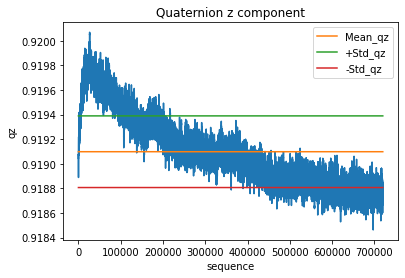

In [158]:
plt.plot(qz)
plt.plot(list_qz, label='Mean_qz')
plt.plot(list_qz_std1, label='+Std_qz')
plt.plot(list_qz_std2, label='-Std_qz')
plt.xlabel('sequence')
plt.ylabel('qz')
plt.title('Quaternion z component')
plt.legend()

Angular velocity 

In [159]:
wx = df_imu['angular_velocity.x']
wy = df_imu['angular_velocity.y']
wz = df_imu['angular_velocity.z']

In [160]:
wx_mean = np.mean(wx)
wx_dev = np.std(wx)
list_wx = np.ones((wx.shape[0],1))*wx_mean
list_wx_std1 = np.ones((wx.shape[0],1))*wx_dev+list_wx
list_wx_std2 = -np.ones((wx.shape[0],1))*wx_dev+list_wx

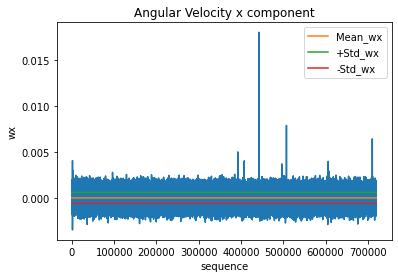

In [161]:
plt.plot(wx)
plt.plot(list_wx, label='Mean_wx')
plt.plot(list_wx_std1, label='+Std_wx')
plt.plot(list_wx_std2, label='-Std_wx')
plt.xlabel('sequence')
plt.ylabel('wx')
plt.title('Angular Velocity x component')
plt.legend()

In [162]:
wy_mean = np.mean(wy)
wy_dev = np.std(wy)
list_wy = np.ones((wy.shape[0],1))*wx_mean
list_wy_std1 = np.ones((wy.shape[0],1))*wy_dev+list_wy
list_wy_std2 = -np.ones((wy.shape[0],1))*wy_dev+list_wy

/usr/local/lib/python3.7/dist-packages/google/colab/_event_manager.py:28: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


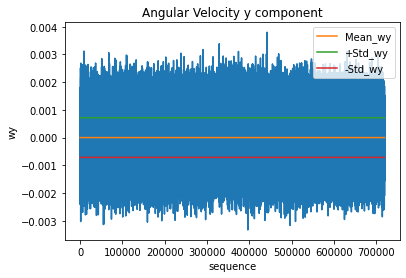

In [163]:
plt.plot(wy)
plt.plot(list_wy, label='Mean_wy')
plt.plot(list_wy_std1, label='+Std_wy')
plt.plot(list_wy_std2, label='-Std_wy')
plt.xlabel('sequence')
plt.ylabel('wy')
plt.title('Angular Velocity y component')
plt.legend()

In [164]:
wz_mean = np.mean(wz)
wz_dev = np.std(wz)
list_wz = np.ones((wz.shape[0],1))*wz_mean
list_wz_std1 = np.ones((wz.shape[0],1))*wz_dev+list_wz
list_wz_std2 = -np.ones((wz.shape[0],1))*wz_dev+list_wz

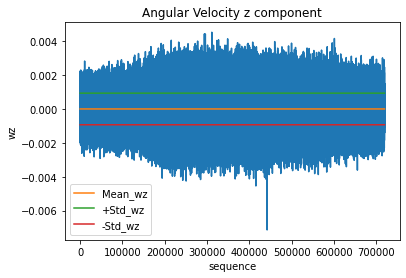

In [165]:
plt.plot(wz)
plt.plot(list_wz, label='Mean_wz')
plt.plot(list_wz_std1, label='+Std_wz')
plt.plot(list_wz_std2, label='-Std_wz')
plt.xlabel('sequence')
plt.ylabel('wz')
plt.title('Angular Velocity z component')
plt.legend()

Linear Accleration 

In [166]:
ax = df_imu['linear_acceleration.x']
ay = df_imu['linear_acceleration.y']
az = df_imu['linear_acceleration.z']

In [167]:
ax_mean = np.mean(ax)
ax_dev = np.std(ax)
list_ax = np.ones((ax.shape[0],1))*ax_mean
list_ax_std1 = np.ones((ax.shape[0],1))*ax_dev+list_ax
list_ax_std2 = -np.ones((ax.shape[0],1))*ax_dev+list_ax

/usr/local/lib/python3.7/dist-packages/google/colab/_event_manager.py:28: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


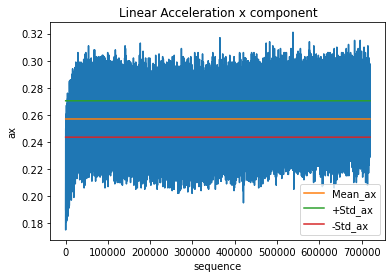

In [168]:
plt.plot(ax)
plt.plot(list_ax, label='Mean_ax')
plt.plot(list_ax_std1, label='+Std_ax')
plt.plot(list_ax_std2, label='-Std_ax')
plt.xlabel('sequence')
plt.ylabel('ax')
plt.title('Linear Acceleration x component')
plt.legend()

In [169]:
ay_mean = np.mean(ay)
ay_dev = np.std(ay)
list_ay = np.ones((ay.shape[0],1))*ay_mean
list_ay_std1 = np.ones((ay.shape[0],1))*ay_dev+list_ay
list_ay_std2 = -np.ones((ay.shape[0],1))*ay_dev+list_ay

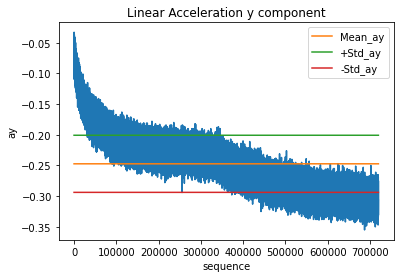

In [170]:
plt.plot(ay)
plt.plot(list_ay, label='Mean_ay')
plt.plot(list_ay_std1, label='+Std_ay')
plt.plot(list_ay_std2, label='-Std_ay')
plt.xlabel('sequence')
plt.ylabel('ay')
plt.title('Linear Acceleration y component')
plt.legend()

In [171]:
az_mean = np.mean(az)
az_dev = np.std(az)
list_az = np.ones((az.shape[0],1))*az_mean
list_az_std1 = np.ones((az.shape[0],1))*az_dev+list_az
list_az_std2 = -np.ones((az.shape[0],1))*az_dev+list_az

/usr/local/lib/python3.7/dist-packages/google/colab/_event_manager.py:28: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


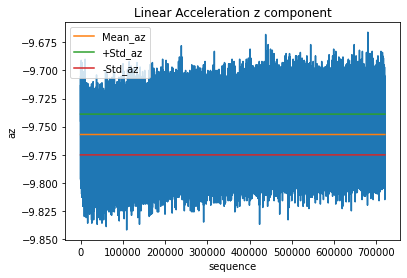

In [172]:
plt.plot(az)
plt.plot(list_az, label='Mean_az')
plt.plot(list_az_std1, label='+Std_az')
plt.plot(list_az_std2, label='-Std_az')
plt.xlabel('sequence')
plt.ylabel('az')
plt.title('Linear Acceleration z component')
plt.legend()

Magnetometer

In [173]:
mx = df_mag['magnetic_field.x']*10000
my = df_mag['magnetic_field.y']*10000
mz = df_mag['magnetic_field.z']*10000

In [174]:
mx_mean = np.mean(mx)
mx_dev = np.std(mx)
list_mx = np.ones((mx.shape[0],1))*mx_mean
list_mx_std1 = np.ones((mx.shape[0],1))*mx_dev+list_mx
list_mx_std2 = -np.ones((mx.shape[0],1))*mx_dev+list_mx

/usr/local/lib/python3.7/dist-packages/google/colab/_event_manager.py:28: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


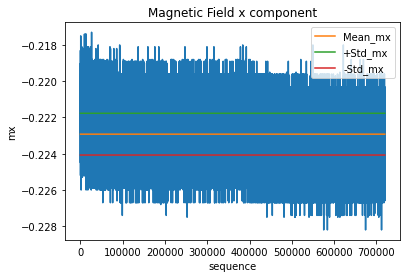

In [175]:
plt.plot(mx)
plt.plot(list_mx, label='Mean_mx')
plt.plot(list_mx_std1, label='+Std_mx')
plt.plot(list_mx_std2, label='-Std_mx')
plt.xlabel('sequence')
plt.ylabel('mx')
plt.title('Magnetic Field x component')
plt.legend()

In [176]:
my_mean = np.mean(my)
my_dev = np.std(my)
list_my = np.ones((my.shape[0],1))*my_mean
list_my_std1 = np.ones((my.shape[0],1))*my_dev+list_my
list_my_std2 = -np.ones((my.shape[0],1))*my_dev+list_my

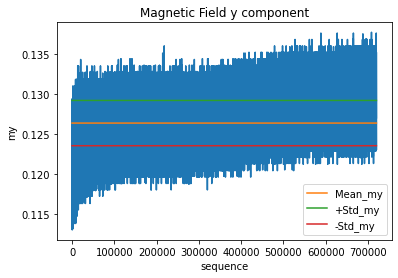

In [177]:
plt.plot(my)
plt.plot(list_my, label='Mean_my')
plt.plot(list_my_std1, label='+Std_my')
plt.plot(list_my_std2, label='-Std_my')
plt.xlabel('sequence')
plt.ylabel('my')
plt.title('Magnetic Field y component')
plt.legend()

In [178]:
mz_mean = np.mean(mz)
mz_dev = np.std(mz)
list_mz = np.ones((mz.shape[0],1))*mz_mean
list_mz_std1 = np.ones((mz.shape[0],1))*mz_dev+list_mz
list_mz_std2 = -np.ones((mz.shape[0],1))*mz_dev+list_mz

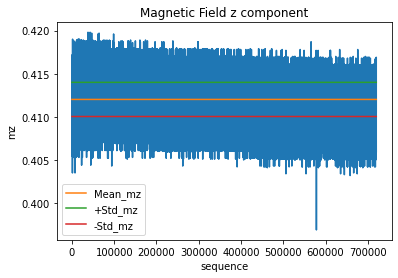

In [179]:
plt.plot(mz)
plt.plot(list_mz, label='Mean_mz')
plt.plot(list_mz_std1, label='+Std_mz')
plt.plot(list_mz_std2, label='-Std_mz')
plt.xlabel('sequence')
plt.ylabel('mz')
plt.title('Magnetic Field z component')
plt.legend()